In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import json
import seaborn as sns
%matplotlib inline

In [22]:
df = pd.read_csv('mls1.csv')

In [142]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'address', 'description', 'sqft',
       'lot_size', 'bedrooms', 'bathrooms', 'half_baths', 'sale_price',
       'yr_built', 'town_Archie', 'town_Belton', 'town_Cleveland',
       'town_Creighton', 'town_Drexel', 'town_East Lynne', 'town_Freeman',
       'town_Garden City', 'town_Greenwood', 'town_Harrisonville',
       'town_Kingsville', 'town_Lake Winnebago', 'town_Lees Summit',
       'town_Loch Lloyd', 'town_Peculiar', 'town_Pleasant Hill',
       'town_Raymore', 'town_Strasburg', 'zip_code'],
      dtype='object')

In [92]:
df['zip_code'] = df['address'].apply(lambda x: x.split('MO')[-1])

/home/robert/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [94]:
df['zip_code'] = df['zip_code'].apply(lambda x: int(x))

/home/robert/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [143]:
eda_df = df[['sqft','lot_size', 'bedrooms', 'bathrooms', 'half_baths', 
             'yr_built', 'sale_price']]

In [144]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f010e0532d0>,
      dtype=object)

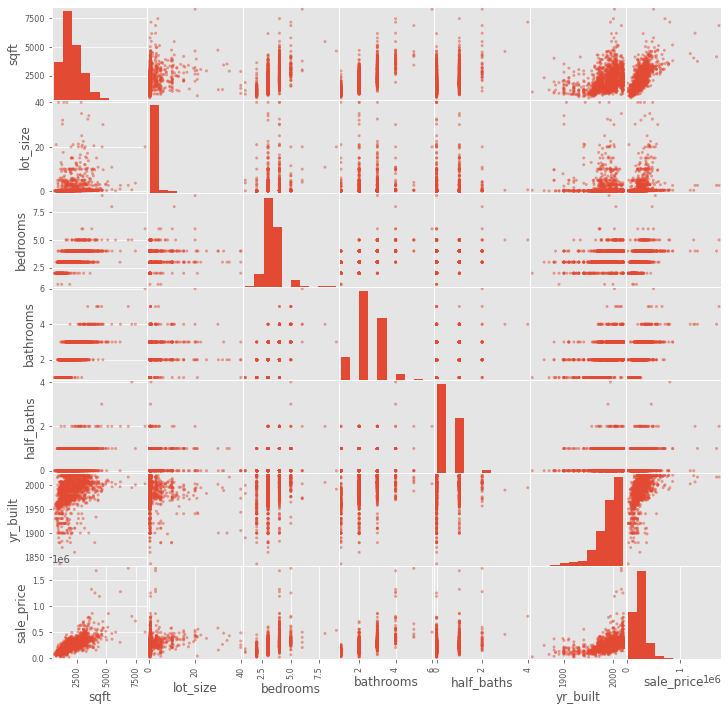

In [146]:
scatter_matrix(eda_df, figsize=(12,12))

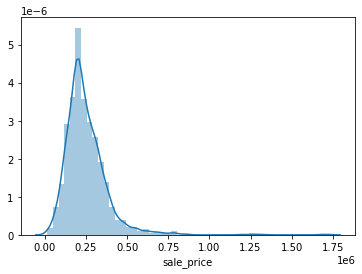

In [27]:
sns.distplot(df['sale_price'])

In [28]:
#skewness and kurtosis
print("Skewness: %f" % df['sale_price'].skew())
print("Kurtosis: %f" % df['sale_price'].kurt())

Skewness: 3.390898
Kurtosis: 25.033271


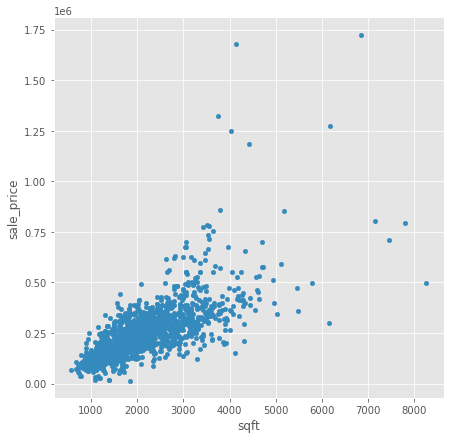

In [32]:
plt.style.use('ggplot')
df.plot.scatter(x='sqft', y='sale_price', figsize=(7,7))

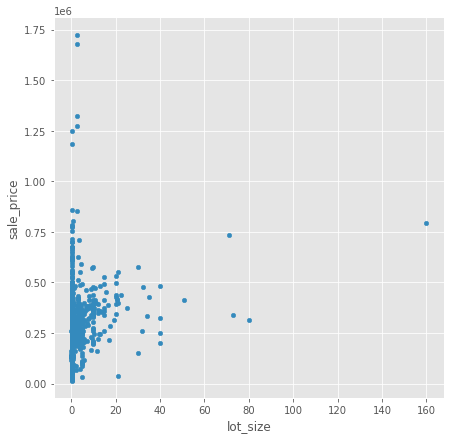

In [31]:
df.plot.scatter(x='lot_size', y='sale_price', figsize=(7,7))

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV

In [40]:
# delete some of the outliers
df = df[df['lot_size']<50]

In [42]:
X = df[['sqft','lot_size', 'bedrooms', 'bathrooms',
        'yr_built', 'town_Archie', 'town_Belton', 'town_Cleveland',
       'town_Creighton', 'town_Drexel', 'town_East Lynne', 'town_Freeman',
       'town_Garden City', 'town_Greenwood', 'town_Harrisonville',
       'town_Kingsville', 'town_Lake Winnebago', 'town_Lees Summit',
       'town_Loch Lloyd', 'town_Peculiar', 'town_Pleasant Hill',
       'town_Raymore', 'town_Strasburg']]
y = df[['sale_price']]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [44]:
linear_model = LinearRegression().fit(X_train, y_train)
linear_model.score(X_test, y_test)

0.6556282309219915

In [45]:
ridge = RidgeCV()
ridge.fit(X_train, y_train)
ridge.score(X_test, y_test)

0.7269965437689022

In [52]:
lasso = LassoCV()
lasso.fit(X_train, y_train)
lasso.score(X_test, y_test)

/home/robert/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.6699841432153221

In [ ]:
# take the log of sale price because of the skew and try again

In [112]:
X = df[['sqft','lot_size', 'bedrooms', 'bathrooms',
        'yr_built', 'town_Archie', 'town_Belton', 'town_Cleveland',
       'town_Creighton', 'town_Drexel', 'town_East Lynne', 'town_Freeman',
       'town_Garden City', 'town_Greenwood', 'town_Harrisonville',
       'town_Kingsville', 'town_Lake Winnebago', 'town_Lees Summit',
       'town_Loch Lloyd', 'town_Peculiar', 'town_Pleasant Hill',
       'town_Raymore', 'town_Strasburg']]
y = np.log(df[['sale_price']])

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [51]:
ridge = RidgeCV()
ridge.fit(X_train, y_train)
ridge.score(X_test, y_test)

0.7452908950390822

In [53]:
pred = ridge.predict(X_test)
y_pred = np.exp(pred)

In [75]:
y_pred

array([[ 121111.26167364],
       [ 258435.380455  ],
       [ 215025.46024757],
       [ 311045.43266231],
       [ 235221.24135724],
       [ 181632.14817999],
       [ 188511.04191871],
       [ 253726.11346411],
       [ 217755.71216271],
       [ 259616.62091525],
       [ 204453.52670791],
       [ 634830.36414174],
       [ 531343.51688355],
       [ 118231.14448765],
       [ 349405.70537794],
       [ 221490.53408813],
       [ 220767.91723571],
       [ 260191.50979375],
       [ 358599.68939258],
       [ 185497.82096298],
       [ 214013.17814227],
       [ 215018.29537873],
       [ 236861.4568953 ],
       [ 363255.34417674],
       [ 340676.65256689],
       [ 201301.89395065],
       [ 191862.36724397],
       [ 282940.61242247],
       [ 125304.88189905],
       [ 109379.97403152],
       [ 228313.03444284],
       [ 238742.11412997],
       [ 393537.25365149],
       [ 198584.44773136],
       [  59947.71824248],
       [ 113852.91049229],
       [ 233701.90258001],
 

In [54]:
y_t = np.exp(y_test)

In [68]:
plt.rcParams['axes.formatter.useoffset'] = False

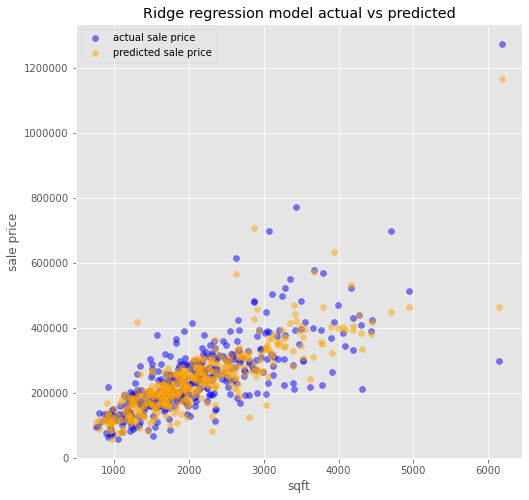

<Figure size 432x288 with 0 Axes>

In [129]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(X_test['sqft'], y_t, c='blue', alpha=0.5, label='actual sale price')
ax.scatter(X_test['sqft'], y_pred, c='orange', alpha=.5, label='predicted sale price')
ax.set_xlabel('sqft')
ax.set_ylabel('sale price')
ax.ticklabel_format(useOffset=False, style='plain')
ax.set_title('Ridge regression model actual vs predicted')
ax.legend()
plt.show()
plt.savefig('plot1.png')

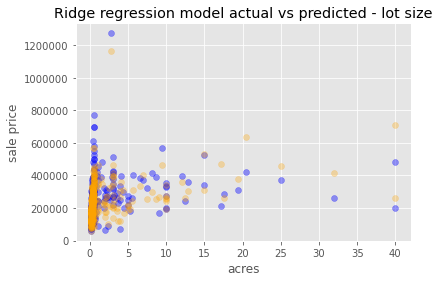

In [81]:
fig, ax = plt.subplots()
ax.scatter(X_test['lot_size'], y_t, c='blue', alpha=0.4)
ax.scatter(X_test['lot_size'], y_pred, c='orange', alpha=.3)
ax.set_xlabel('acres')
ax.set_ylabel('sale price')
ax.ticklabel_format(useOffset=False, style='plain')
ax.set_title('Ridge regression model actual vs predicted - lot size')
plt.show()

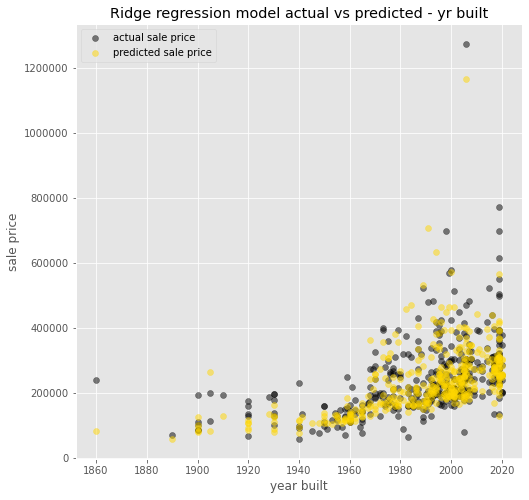

In [141]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(X_test['yr_built'], y_t, c='black', alpha=0.5, label='actual sale price')
ax.scatter(X_test['yr_built'], y_pred, c='gold', alpha=.5, label='predicted sale price')
ax.set_xlabel('year built')
ax.set_ylabel('sale price')
ax.ticklabel_format(useOffset=False, style='plain')
ax.set_title('Ridge regression model actual vs predicted - yr built')
ax.legend()
plt.show()

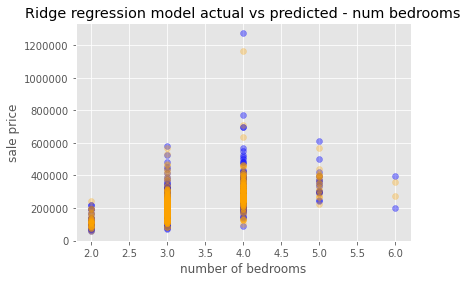

In [131]:
fig, ax = plt.subplots()
ax.scatter(X_test['bedrooms'], y_t, c='blue', alpha=0.4)
ax.scatter(X_test['bedrooms'], y_pred, c='orange', alpha=.3)
ax.set_xlabel('number of bedrooms')
ax.set_ylabel('sale price')
ax.ticklabel_format(useOffset=False, style='plain')
ax.set_title('Ridge regression model actual vs predicted - num bedrooms')
plt.show()

In [56]:
# predict the price with a function
def price_predictor(sqft, lot_size, bedrooms, bathrooms, yr_built, location):
    loc_index = np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = lot_size
    x[2] = bedrooms
    x[3] = bathrooms
    x[4] = yr_built
    if loc_index > 0:
        x[loc_index] = 1
    prediction = np.exp(ridge.predict([x])[0])
    val = np.ndarray.item(prediction)
    value = '${:,.0f}'.format(val)
    return value

In [59]:
price_predictor(3000,5,4,3,2020,'town_Raymore')

'$410,910'

In [60]:
price_predictor(3000,5,4,3,2020,'town_Peculiar')

'$381,138'

In [61]:
price_predictor(3000,5,4,3,2020,'town_Archie')

'$299,865'

In [62]:
price_predictor(3000,5,4,3,2020,'town_Lees Summit')

'$455,049'

In [ ]:
# as someone that grew up there, I buy those numbers all day, let's check lot size too

In [63]:
price_predictor(3000,1,4,3,2020,'town_Peculiar'), price_predictor(3000,3,4,3,2020,'town_Peculiar')

('$341,400', '$360,722')

In [ ]:
# about 10k per acre difference in Peculiar, that's what land goes for up there

In [96]:
import pickle

In [97]:
with open('ccmohp_model1.pickle', 'wb') as f:
    pickle.dump(ridge, f)

In [108]:
columns = {'data_columns':[col for col in X.columns]}
with open('columns1.json','w') as f:
    f.write(json.dumps(columns))

In [114]:
with open('df.pkl', 'wb') as f:
    pickle.dump(df, f)

In [109]:
with open('/home/robert/cchp/app/data/ccmohp_model1.pickle','rb') as f:
    model = pickle.load(f)

features = ["sqft", "lot_size", "bedrooms", "bathrooms", "yr_built", 
            "town_Archie", "town_Belton", "town_Cleveland", "town_Creighton", 
            "town_Drexel", "town_East Lynne", "town_Freeman", "town_Garden City", 
            "town_Greenwood", "town_Harrisonville", "town_Kingsville", 
            "town_Lake Winnebago", "town_Lees Summit", "town_Loch Lloyd", 
            "town_Peculiar", "town_Pleasant Hill", "town_Raymore", "town_Strasburg"]

In [115]:
with open('/home/robert/cchp/app/data/df.pkl','rb') as f:
    df1 = pickle.load(f)

In [116]:
df1

,Unnamed: 0,Unnamed: 0.1,address,description,sqft,lot_size,bedrooms,bathrooms,half_baths,sale_price,...,town_Harrisonville,town_Kingsville,town_Lake Winnebago,town_Lees Summit,town_Loch Lloyd,town_Peculiar,town_Pleasant Hill,town_Raymore,town_Strasburg,zip_code
0,0,0,"210 Sitter Street Pleasant Hill, MO 64080","4Bedrms2Full Bath(s)0Half Bath(s)1,848Sqft Bui...",1848,0.27,4,2,0,15000,...,0,0,0,0,0,0,1,0,0,64080
1,1,1,"115 S Campbell Street Pleasant Hill, MO 64080","2Bedrms2Full Bath(s)0Half Bath(s)1,397SqftBuil...",1397,0.20,2,2,0,18500,...,0,0,0,0,0,0,1,0,0,64080
2,2,2,"115 S Campbell Street Pleasant Hill, MO 64080","2Bedrms2Full Bath(s)0Half Bath(s)1,397SqftBuil...",1397,0.20,2,2,0,19500,...,0,0,0,0,0,0,1,0,0,64080
3,3,3,"201 N State Route E Highway Strasburg, MO 64080","2Bedrms1Full Bath(s)0Half Bath(s)1,088SqftBuil...",1088,0.50,2,1,0,19500,...,0,0,0,0,0,0,0,0,1,64080
4,4,4,"204 N Missouri Street Archie, MO 64725","2Bedrms1Full Bath(s)0Half Bath(s)1,176SqftBuil...",1176,0.20,2,1,0,27200,...,0,0,0,0,0,0,0,0,0,64725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,1722,1722,"511 Mark LaneBelton, MO 64012","3Bedrms2Full Bath(s)1Half Bath(s)1,780SqftBuil...",1780,0.25,3,2,1,169000,...,0,0,0,0,0,0,0,0,0,64012
1618,1723,1723,"29715 E 227th StreetPleasant Hill, MO 64080","3Bedrms1Full Bath(s)1Half Bath(s)1,472SqftBuil...",1472,4.00,3,1,1,169500,...,0,0,0,0,0,0,1,0,0,64080
1619,1724,1724,"700 Twilight CourtRaymore, MO 64083","2Bedrms2Full Bath(s)0Half Bath(s)1,394SqftBuil...",1394,0.20,2,2,0,169950,...,0,0,0,0,0,0,0,1,0,64083
1620,1725,1725,"532 S Truman RoadArchie, MO 64725","3Bedrms2Full Bath(s)0Half Bath(s)1,476SqftBuil...",1476,0.20,3,2,0,170000,...,0,0,0,0,0,0,0,0,0,64725


In [117]:
X1 = df1[features]
X1

,sqft,lot_size,bedrooms,bathrooms,yr_built,town_Archie,town_Belton,town_Cleveland,town_Creighton,town_Drexel,...,town_Greenwood,town_Harrisonville,town_Kingsville,town_Lake Winnebago,town_Lees Summit,town_Loch Lloyd,town_Peculiar,town_Pleasant Hill,town_Raymore,town_Strasburg
0,1848,0.27,4,2,1950,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1397,0.20,2,2,1920,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1397,0.20,2,2,1920,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1088,0.50,2,1,1836,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1176,0.20,2,1,1971,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,1780,0.25,3,2,1974,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1618,1472,4.00,3,1,2014,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1619,1394,0.20,2,2,1997,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1620,1476,0.20,3,2,2006,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
# testing the function for the flask app
def get_price_prediction(sqft, lot_size, bedrooms, bathrooms, yr_built, location):
    # sqft = finished square footage, integer
    #lot_size in acres if given in sqft 1 acre is 43560 sqft
    # bedrooms number of conforming bedrooms - conforming means it has a closet
    # bathrooms - number of full bathrooms
    # year built, if remodeled put this year
    # location is town
    loc_index = np.where(X1.columns==location)[0][0]
    
    x = np.zeros(len(X1.columns))
    x[0] = sqft
    x[1] = lot_size
    x[2] = bedrooms
    x[3] = bathrooms
    x[4] = yr_built
    if loc_index > 0:
        x[loc_index] = 1
    prediction = np.exp(model.predict([x])[0])
    val = np.ndarray.item(prediction)
    value = '${:,.0f}'.format(val)
    return value

In [119]:
get_price_prediction(3000, 5, 4, 3, 2020, 'town_Peculiar')

'$381,138'